In [65]:
#导入必须的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
plt.style.use('fivethirtyeight')#画图风格
np.random.seed(100)
window=12#时间窗
label_dim=3#标签纬度
scale=100#归一化参数
amount_of_features=1#特征数量
d=0.05#dropout系数
batch_size=64#批训练数量
epoch=200#总迭代次数
train_file='international-airline-passengers.csv'#读取训练集地址
test_file='example.csv'#读取训练集地址
save_file='predict_result_ann.csv'#储存预测值地址

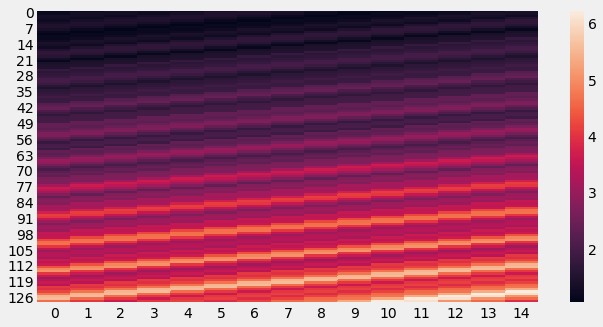

In [66]:
data=pd.read_csv(train_file,header=0) 
data=data['passengers']#选数据集的哪一列
#构造针对机器学习模型的数据集
data=data.values 
dataset=data
for i in range(window+label_dim-1):
    zero=np.zeros(i+1)
    temp=np.append(data[i+1:],zero)
    dataset=np.row_stack((dataset,temp))
dataset=pd.DataFrame(dataset).T
dataset=dataset.iloc[:-(window+label_dim)]
dataset=dataset/scale#进行伪归一化
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataset,annot=False)
plt.show()#展示下原始数据集

In [67]:
#划分特征与标签
X=dataset.iloc[:,:window]
y=dataset.iloc[:,-label_dim:]

In [68]:
#构造训练集测试集
X,y=X.values,y.values
print(X.shape)#通过输出训练集测试集的大小来判断数据格式正确。
print(y.shape)

(129, 12)
(129, 3)


In [69]:
#建立ANN模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
#from keras.layers.recurrent import LSTM
#建立训练模型过程
model = Sequential()#建立层次模型
model.add(Dense(label_dim*4,input_dim=window,activation='relu'))#建立LSTM层
#model.add(Dropout(d))
#model.add(Dense(label_dim*2,activation='relu'))   #建立全连接层  
#model.add(Dropout(d))
model.add(Dense(label_dim))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 39        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [70]:
#神经网络训练及结果
history = model.fit(X, y, epochs =epoch, batch_size = batch_size,verbose=1,validation_split=0.1) #训练模型nb_epoch次

Train on 116 samples, validate on 13 samples
Epoch 1/200
116/116 [==============================] - 0s 3ms/step - loss: 8.4813 - acc: 0.3017 - val_loss: 20.8116 - val_acc: 0.3846
Epoch 2/200
116/116 [==============================] - 0s 39us/step - loss: 7.7277 - acc: 0.3017 - val_loss: 18.9391 - val_acc: 0.3846
Epoch 3/200
116/116 [==============================] - 0s 46us/step - loss: 7.0065 - acc: 0.3017 - val_loss: 17.1723 - val_acc: 0.3846
Epoch 4/200
116/116 [==============================] - 0s 40us/step - loss: 6.3747 - acc: 0.3017 - val_loss: 15.5042 - val_acc: 0.3846
Epoch 5/200
116/116 [==============================] - 0s 49us/step - loss: 5.7395 - acc: 0.3017 - val_loss: 13.9637 - val_acc: 0.3846
Epoch 6/200
116/116 [==============================] - 0s 43us/step - loss: 5.1677 - acc: 0.3017 - val_loss: 12.5453 - val_acc: 0.3846
Epoch 7/200
116/116 [==============================] - 0s 49us/step - loss: 4.6219 - acc: 0.3017 - val_loss: 11.2236 - val_acc: 0.3846
Epoch 8/200

116/116 [==============================] - 0s 57us/step - loss: 0.1414 - acc: 0.3707 - val_loss: 0.4198 - val_acc: 0.1538
Epoch 62/200
116/116 [==============================] - 0s 69us/step - loss: 0.1411 - acc: 0.3707 - val_loss: 0.4188 - val_acc: 0.1538
Epoch 63/200
116/116 [==============================] - 0s 46us/step - loss: 0.1409 - acc: 0.3707 - val_loss: 0.4178 - val_acc: 0.1538
Epoch 64/200
116/116 [==============================] - 0s 73us/step - loss: 0.1405 - acc: 0.3707 - val_loss: 0.4168 - val_acc: 0.1538
Epoch 65/200
116/116 [==============================] - 0s 66us/step - loss: 0.1402 - acc: 0.3707 - val_loss: 0.4159 - val_acc: 0.1538
Epoch 66/200
116/116 [==============================] - 0s 72us/step - loss: 0.1399 - acc: 0.3707 - val_loss: 0.4149 - val_acc: 0.1538
Epoch 67/200
116/116 [==============================] - 0s 72us/step - loss: 0.1396 - acc: 0.3707 - val_loss: 0.4138 - val_acc: 0.1538
Epoch 68/200
116/116 [==============================] - 0s 94us/step

Epoch 121/200
116/116 [==============================] - 0s 68us/step - loss: 0.1199 - acc: 0.3707 - val_loss: 0.3448 - val_acc: 0.3077
Epoch 122/200
116/116 [==============================] - 0s 82us/step - loss: 0.1195 - acc: 0.3707 - val_loss: 0.3434 - val_acc: 0.3077
Epoch 123/200
116/116 [==============================] - 0s 89us/step - loss: 0.1191 - acc: 0.3707 - val_loss: 0.3421 - val_acc: 0.3077
Epoch 124/200
116/116 [==============================] - 0s 55us/step - loss: 0.1188 - acc: 0.3707 - val_loss: 0.3407 - val_acc: 0.3077
Epoch 125/200
116/116 [==============================] - 0s 96us/step - loss: 0.1184 - acc: 0.3707 - val_loss: 0.3393 - val_acc: 0.3077
Epoch 126/200
116/116 [==============================] - 0s 48us/step - loss: 0.1180 - acc: 0.3707 - val_loss: 0.3378 - val_acc: 0.3077
Epoch 127/200
116/116 [==============================] - 0s 49us/step - loss: 0.1176 - acc: 0.3707 - val_loss: 0.3365 - val_acc: 0.3077
Epoch 128/200
116/116 [=========================

116/116 [==============================] - 0s 70us/step - loss: 0.1018 - acc: 0.4052 - val_loss: 0.2824 - val_acc: 0.3077
Epoch 182/200
116/116 [==============================] - 0s 76us/step - loss: 0.1016 - acc: 0.4052 - val_loss: 0.2816 - val_acc: 0.3077
Epoch 183/200
116/116 [==============================] - 0s 101us/step - loss: 0.1014 - acc: 0.3966 - val_loss: 0.2808 - val_acc: 0.3077
Epoch 184/200
116/116 [==============================] - 0s 47us/step - loss: 0.1012 - acc: 0.3966 - val_loss: 0.2800 - val_acc: 0.3077
Epoch 185/200
116/116 [==============================] - 0s 78us/step - loss: 0.1009 - acc: 0.3966 - val_loss: 0.2791 - val_acc: 0.3077
Epoch 186/200
116/116 [==============================] - 0s 78us/step - loss: 0.1007 - acc: 0.3966 - val_loss: 0.2783 - val_acc: 0.3077
Epoch 187/200
116/116 [==============================] - 0s 64us/step - loss: 0.1005 - acc: 0.3966 - val_loss: 0.2774 - val_acc: 0.3077
Epoch 188/200
116/116 [==============================] - 0s 9

In [76]:
#筛选测试集
test=pd.read_csv(test_file,header=0) 
test=test['passengers']/scale#选数据集的哪一列
test=np.reshape(test.values, (1, window))
print(test.shape)

(1, 12)


In [77]:
#实际预测
predict=model.predict(test)[0,:]*scale
#储存文件
(pd.DataFrame(predict)).to_csv(save_file)
print(predict)

[435.31952 450.9297  521.5045 ]


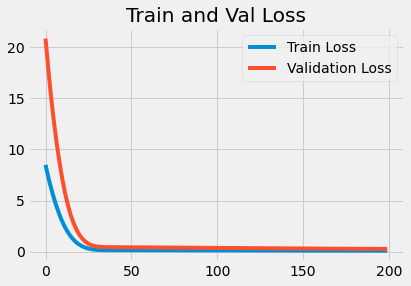

In [78]:
#迭代图像
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

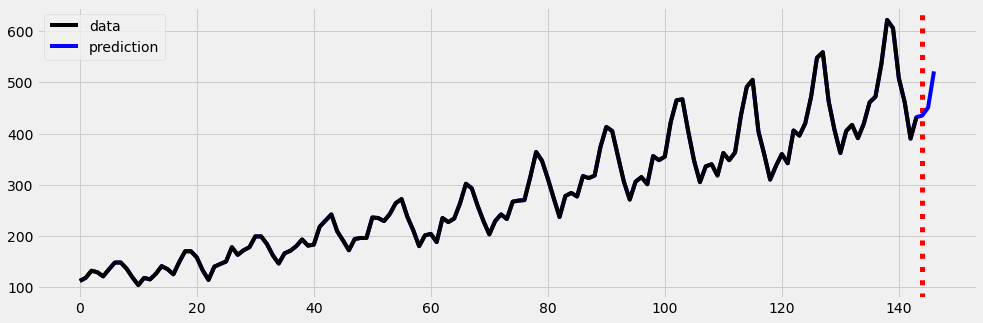

In [79]:

data_times=np.arange(len(data))
all_data=np.hstack((data,predict)) 
predicted_times=np.arange(len(all_data))
plt.figure(figsize=(15, 5))
plt.axvline(len(data), linestyle="dotted", linewidth=5, color='r')
predicted_lines = plt.plot(predicted_times, all_data, label="prediction", color="b")
data_lines = plt.plot(data_times, data, label="data", color="k")
plt.legend(handles=[data_lines[0], predicted_lines[0]],loc="upper left")
#为训练，验证，预测数据分别创建图例
plt.show()